# ATTAINS DATA EXPLORATION
<i> Ryan Treves

### Questions:
- How many Assessment Units (AUs) exist nationwide?
- For many AUs do we have a HUC code match?
- How many use assessments nationwide, ever, have contributed to an IR5 category determination?
- How many unique assessment units have been assigned category IR5?
- Which states have had the most use assessments leading to IR5 determinations?
- Which states have had the highest rate of IR5 determinations per assessment unit?
- For what fraction of use assessments do we have an assessment date?
- What parameters have caused the most use non-attainment declarations?
- What parameters have caused the most assessment units to be categorized as IR5, irrespective of number of use non-attainment declarations?
- What uses have the highest rate of non-attainment?

Note: the dataset of AUs doesn't include Pennsylvania (see `ATTAINS_data_cleaning.ipynb` for an explanation)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from urllib.request import urlopen
import datetime as dt

# display all rows & columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Assessment Units

In [2]:
# Load in national Assessment Unit (AU) data
AUs = pd.read_csv('Clean_AU_data/all_AUs_cleaned.csv')

/var/folders/1h/lmmglcgx2652108zjxqs36vr0000gq/T/ipykernel_40909/2797704080.py:2: DtypeWarning: Columns (5,11,16,17,18,19,20,21,22,23,24,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  AUs = pd.read_csv('Clean_AU_data/all_AUs_cleaned.csv')


In [3]:
AUs.head()

,Unnamed: 0.1,Unnamed: 0,AUID,items.organizationIdentifier,items.organizationName,items.assessmentUnits.assessmentUnitIdentifier,items.assessmentUnits.assessmentUnitName,items.assessmentUnits.agencyCode,items.assessmentUnits.statusIndicator,items.assessmentUnits.useClass,items.assessmentUnits.waterTypes.waterTypeCode,items.assessmentUnits.waterTypes.waterSizeNumber,items.assessmentUnits.waterTypes.unitsCode,HUC-8,items.organizationTypeText,HUC-12,count,items.assessmentUnits.locationDescriptionText,items.assessmentUnits.stateCode,items.assessmentUnits.waterTypes.sizeEstimationMethodCode,items.assessmentUnits.waterTypes.sizeSourceText,items.assessmentUnits.waterTypes.sizeSourceScaleText,items.assessmentUnits.monitoringStations.monitoringOrganizationIdentifier,items.assessmentUnits.monitoringStations.monitoringLocationIdentifier,items.assessmentUnits.monitoringStations.monitoringDataLinkText,items.assessmentUnits.locations.locationTypeCode,items.assessmentUnits.locations.locationText,HUC-10
0,0,0,WYGR140401040103_01,Wyoming,State,Lower Big Sandy River,From the confluence with Squaw Creek downstrea...,WY,"{\useClassCode\"":\""85\""","\""useClassName\"":\""CLASS 2AB\""}""",STREAM,2.1,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,WYNP101800020105_02,Wyoming,State,Muddy Creek,Entire watershed upstream of the confluence wi...,WY,"{\useClassCode\"":\""85\""","\""useClassName\"":\""CLASS 2AB\""}""",STREAM,44.5,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,WYBH100800140107_01,Wyoming,State,Dry Gulch,From the confluence with the Shoshone River to...,WY,"{\useClassCode\"":\""117\""","\""useClassName\"":\""CLASS 3B\""}""",STREAM,0.5,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,WYBH100800030108_02,Wyoming,State,Little Popo Agie River,From the confluence with the Popo Agie River u...,WY,"{\useClassCode\"":\""85\""","\""useClassName\"":\""CLASS 2AB\""}""",STREAM,11.1,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,WYGR140401040303 _01,Wyoming,State,Pacific Creek,Confluence with Jack Morrow Creek upstream to ...,WY,"{\useClassCode\"":\""85\""","\""useClassName\"":\""CLASS 2AB\""}""",STREAM,13.8,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How many Assessment Units (AUs) exist nationwide?
Note: this estimate doesn't include Pennsylvania, which according to https://attains.epa.gov/attains-public/api/assessmentUnits?stateCode=PA&returnCountOnly=Y contains on the order of 200,000 AUs on its own.

In [4]:
len(AUs['AUID'].unique())

331553

### For many AUs do we have a HUC code match?

In [5]:
AUs[(~pd.isna(AUs['HUC-12'])) | (~pd.isna(AUs['HUC-10'])) | (~pd.isna(AUs['HUC-8']))].shape[0]

99534

Note - that fact that we don't have HUC code matches for every AU may not be as big an issue as it seems.

# Assessments
Source: `pull_IR5_assessments.R`

### How many use assessments nationwide, ever, have contributed to an IR5 category determination?
Here, a use assessment is uniquely identified by assessmentUnitIdentifier + useName + reportingCycleText + assessment_date

In [8]:
assessments = pd.read_csv('all_IR5_assessments.csv', dtype={'reportingCycleText': str}, parse_dates=['assessment_date'], date_parser=lambda t: pd.to_datetime(t, errors='coerce'))
assessments.head()

/var/folders/1h/lmmglcgx2652108zjxqs36vr0000gq/T/ipykernel_48547/2328312251.py:1: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  assessments = pd.read_csv('all_IR5_assessments.csv', dtype={'reportingCycleText': str}, parse_dates=['assessment_date'], date_parser=lambda t: pd.to_datetime(t, errors='coerce'))


,Unnamed: 0.1,Unnamed: 0,state_code,organizationIdentifier,organizationTypeText,reportingCycleText,reportStatusCode,assessmentUnitIdentifier,trophicStatusCode,useName,useAttainmentCode,threatenedIndicator,parameterStatusName,parameterName,cycle_first_listed,cycleLastAssessedText,cycle_scheduled_for_TMDL,assessment_date
0,0,1,AL,21AWIC,State,2008,Historical,AL-Gulf-of-Mexico,NaN,Contact Recreation,F,N,Cause,MERCURY,2006.0,1998,2013.0,1998-04-01
1,1,2,AL,21AWIC,State,2008,Historical,AL-Gulf-of-Mexico,NaN,Fishing,N,N,Cause,MERCURY,2006.0,1998,2013.0,1998-04-01
2,2,3,AL,21AWIC,State,2008,Historical,AL-Gulf-of-Mexico,NaN,Propagation of Fish and Wildlife,F,N,Cause,MERCURY,2006.0,1998,2013.0,1998-04-01
3,3,4,AL,21AWIC,State,2008,Historical,AL-Gulf-of-Mexico,NaN,Shellfishing,N,N,Cause,MERCURY,2006.0,1998,2013.0,1998-04-01
4,4,5,AL,21AWIC,State,2008,Historical,AL-Gulf-of-Mexico,NaN,Industrial and Agriculture Uses,F,N,Cause,MERCURY,2006.0,1998,2013.0,1998-04-01


In [9]:
assessments.dtypes

Unnamed: 0.1                         int64
Unnamed: 0                           int64
state_code                          object
organizationIdentifier              object
organizationTypeText                object
reportingCycleText                  object
reportStatusCode                    object
assessmentUnitIdentifier            object
trophicStatusCode                   object
useName                             object
useAttainmentCode                   object
threatenedIndicator                 object
parameterStatusName                 object
parameterName                       object
cycle_first_listed                 float64
cycleLastAssessedText                int64
cycle_scheduled_for_TMDL           float64
assessment_date             datetime64[ns]
dtype: object

In [18]:
# All states are required to submit their 303(d) lists by April 1st - hence the cycles can be assigned to April 1st
assessments['reportingCycleText'] = pd.to_datetime(assessments['reportingCycleText'] + '-04-01', errors='coerce')
def repair_date(x):
    if not pd.isna(x):
        return pd.to_datetime(str(int(x)) + '-04-01', errors='coerce')
    return(x)
assessments['cycle_scheduled_for_TMDL'] = assessments['cycle_scheduled_for_TMDL'].apply(lambda x: repair_date(x))

In [19]:
assessments.head()

,Unnamed: 0.1,Unnamed: 0,state_code,organizationIdentifier,organizationTypeText,reportingCycleText,reportStatusCode,assessmentUnitIdentifier,trophicStatusCode,useName,useAttainmentCode,threatenedIndicator,parameterStatusName,parameterName,cycle_first_listed,cycleLastAssessedText,cycle_scheduled_for_TMDL,assessment_date
0,0,1,AL,21AWIC,State,2008-04-01,Historical,AL-Gulf-of-Mexico,NaN,Contact Recreation,F,N,Cause,MERCURY,2006.0,1998,2013-04-01,1998-04-01
1,1,2,AL,21AWIC,State,2008-04-01,Historical,AL-Gulf-of-Mexico,NaN,Fishing,N,N,Cause,MERCURY,2006.0,1998,2013-04-01,1998-04-01
2,2,3,AL,21AWIC,State,2008-04-01,Historical,AL-Gulf-of-Mexico,NaN,Propagation of Fish and Wildlife,F,N,Cause,MERCURY,2006.0,1998,2013-04-01,1998-04-01
3,3,4,AL,21AWIC,State,2008-04-01,Historical,AL-Gulf-of-Mexico,NaN,Shellfishing,N,N,Cause,MERCURY,2006.0,1998,2013-04-01,1998-04-01
4,4,5,AL,21AWIC,State,2008-04-01,Historical,AL-Gulf-of-Mexico,NaN,Industrial and Agriculture Uses,F,N,Cause,MERCURY,2006.0,1998,2013-04-01,1998-04-01


In [7]:
assessments_nonattainment = assessments[assessments['useAttainmentCode']=='N']
assessments_nonattainment.drop_duplicates(subset=['assessmentUnitIdentifier', 'useName', 'reportingCycleText', 'assessment_date']).shape[0]

564221

### How many unique assessment units have been assigned category IR5?

In [8]:
len(assessments['assessmentUnitIdentifier'].unique())

126751

### Which states have had the most use assessments leading to IR5 determinations?

In [9]:
assessments_nonattainment.drop_duplicates(subset=['assessmentUnitIdentifier', 'useName', 'reportingCycleText', 'assessment_date'])['state_code'].value_counts()

PA    226200
VA     27282
NH     22287
IN     19875
MI     15928
WV     14355
MN     14161
FL     12923
NC     12718
TN     12564
CA     11523
KY     11422
NJ     11141
OR     10842
OK      9592
MA      9164
ID      8943
WA      8330
KS      8263
OH      7425
MT      7320
SC      6850
TX      6672
WI      5559
IL      5378
CT      4145
CO      3816
PR      3722
AL      3661
LA      3538
IA      3255
NM      2908
HI      2620
UT      2518
GA      2511
RI      2347
NV      2293
SD      2190
NE      2003
MS      1787
VT      1761
ME      1665
AR      1619
MD      1419
DE      1395
MO      1237
VI      1183
AK       845
AZ       782
WY       750
NY       664
ND       629
GU       241
Name: state_code, dtype: int64

### Which states have had the highest rate of IR5 determinations per assessment unit?

In [10]:
# Get counts of assessment units in each state
AU_counts = {}
for state in assessments['state_code'].unique():
    response = urlopen('https://attains.epa.gov/attains-public/api/assessmentUnits?stateCode=' + state + '&returnCountOnly=Y')
    data = json.loads(response.read())['count']
    AU_counts[state] = data

In [11]:
rates = pd.DataFrame(assessments_nonattainment.drop_duplicates(subset=['assessmentUnitIdentifier', 'useName', 'reportingCycleText', 'assessment_date'])['state_code'].value_counts())
rates = rates.reset_index().rename(columns = {'index':'state', 'state_code':'# IR5 use assessments'})
rates['AUs'] = rates['state'].apply(lambda x: AU_counts[x])
rates['IR5 use assessment rate'] = rates['# IR5 use assessments']/rates['AUs']

In [12]:
rates.sort_values(by='IR5 use assessment rate', ascending=False).iloc[0:10]

,state,# IR5 use assessments,AUs,IR5 use assessment rate
12,NJ,11141,958,11.629436
27,PR,3722,358,10.396648
46,VI,1183,177,6.683616
29,LA,3538,563,6.284192
20,MT,7320,1203,6.084788
37,SD,2190,400,5.475000
19,OH,7425,1723,4.309344
18,KS,8263,2421,3.413052
15,MA,9164,2764,3.315485
36,NV,2293,711,3.225035


### For what fraction of use assessments do we have an assessment date?

In [13]:
use_assessments_unique = assessments.drop_duplicates(subset=['assessmentUnitIdentifier', 'useName', 'reportingCycleText', 'assessment_date'])
use_assessments_unique[~pd.isna(use_assessments_unique['assessment_date'])].shape[0]/use_assessments_unique.shape[0]

0.24028999680744875

### What parameters have caused the most use non-attainment declarations?

In [14]:
assessments[assessments['parameterStatusName']=='Cause']['parameterName'].value_counts(normalize=True).iloc[0:10]

ESCHERICHIA COLI (E. COLI)          0.077221
PATHOGENS                           0.055360
DISSOLVED OXYGEN                    0.050509
POLYCHLORINATED BIPHENYLS (PCBS)    0.044071
PCBS IN FISH TISSUE                 0.044023
FECAL COLIFORM                      0.037691
SEDIMENTATION/SILTATION             0.035051
MERCURY IN FISH TISSUE              0.034144
SILTATION                           0.033814
MERCURY                             0.030667
Name: parameterName, dtype: float64

### What parameters have caused the most assessment units to be categorized as IR5, irrespective of number of use non-attainment declarations?

In [15]:
IR5_culprits_unique = assessments.drop_duplicates(subset=['assessmentUnitIdentifier', 'reportingCycleText', 'assessment_date', 'parameterName'])

IR5_culprits_unique[IR5_culprits_unique['parameterStatusName']=='Cause']['parameterName'].value_counts(normalize=True).iloc[0:10]

PATHOGENS                           0.089291
ESCHERICHIA COLI (E. COLI)          0.075443
SILTATION                           0.072346
DISSOLVED OXYGEN                    0.045512
PCBS IN FISH TISSUE                 0.037096
MERCURY                             0.036874
FECAL COLIFORM                      0.035271
POLYCHLORINATED BIPHENYLS (PCBS)    0.033996
PH                                  0.032374
CAUSE UNKNOWN                       0.031365
Name: parameterName, dtype: float64

### What uses have the highest rate of non-attainment?

In [16]:
use_assessments_unique['useName'].value_counts(normalize=True).iloc[0:10]

Water Contact Sports            0.082313
Fish Consumption                0.059401
Fishing                         0.052269
Warm Water Fishes               0.049517
Cold Water Fishes               0.043985
Aquatic Life                    0.032166
Primary Contact Recreation      0.029205
Recreation                      0.027474
Trout Stocking                  0.024389
Secondary Contact Recreation    0.022256
Name: useName, dtype: float64

# Actions
Source: `pull_actions.R`

In [21]:
all_actions = pd.read_csv('all_actions.csv', parse_dates=['completionDate', 'TMDLDate'], date_parser=lambda t: pd.to_datetime(t, errors='coerce')).drop('Unnamed: 0', axis=1).drop_duplicates()
all_actions_permit_data = pd.read_csv('all_actions_permit_data.csv').drop('Unnamed: 0', axis=1).drop_duplicates()

/var/folders/1h/lmmglcgx2652108zjxqs36vr0000gq/T/ipykernel_48547/1988036257.py:1: DtypeWarning: Columns (4,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  all_actions = pd.read_csv('all_actions.csv', parse_dates=['completionDate', 'TMDLDate'], date_parser=lambda t: pd.to_datetime(t, errors='coerce')).drop('Unnamed: 0', axis=1).drop_duplicates()


In [82]:
all_actions.head()

,organizationIdentifier,organizationTypeText,state_code,actionIdentifier,actionTypeCode,actionStatusCode,completionDate,assessmentUnitIdentifier,pollutantName,pollutantSourceTypeCode,explicitMarginofSafetyText,implicitMarginofSafetyText,TMDLEndPointText,TMDLDate
0,21AWIC,State,AL,36562,TMDL,EPA Final Action,2009-09-23,AL03160205-0310-702,FECAL COLIFORM,Nonpoint source,1320000000 CFU/DAY,N,JUNE-SEPTEMBER: GEOMETRIC MEAN OF 200 COLONIES...,2009-09-23
2,21AWIC,State,AL,36561,TMDL,EPA Final Action,2009-09-23,AL03160205-0202-400,FECAL COLIFORM,Both,2010000000 CFU/DAY,N,JUNE-SEPTEMBER: GEOMETRIC MEAN OF 200 COLONIES...,2009-09-23
4,21AWIC,State,AL,36556,TMDL,EPA Final Action,2009-09-23,AL03150202-0202-401,FECAL COLIFORM,Both,7290000000 CFU/DAY,N,JUNE-SEPTEMBER: GEOMETRIC MEAN OF 200 COLONIES...,2009-09-23
6,21AWIC,State,AL,36559,TMDL,EPA Final Action,2009-09-23,AL03160205-0202-300,FECAL COLIFORM,Both,1660000000 CFU/DAY,N,JUNE-SEPTEMBER: GEOMETRIC MEAN OF 200 COLONIES...,2009-09-23
8,21AWIC,State,AL,39070,TMDL,EPA Final Action,2010-09-21,AL03140107-0205-102,ENTEROCOCCUS BACTERIA,Nonpoint source,NaN,N,"IN COASTAL WATERS, BACTERIA OF THE ENTEROCOCCI...",2010-09-21


In [74]:
len(all_actions)

249039

### How many unique TMDL actions do we have?

In [75]:
len(all_actions.drop_duplicates(subset='actionIdentifier'))

20009

### How many unique AUs are represented in the actions data?

In [76]:
len(all_actions.drop_duplicates(subset='assessmentUnitIdentifier'))

96171

### Which states have the most TMDL actions?

In [77]:
all_actions.drop_duplicates(subset='actionIdentifier')['state_code'].value_counts(normalize=True)

WV    0.268479
KS    0.101804
VA    0.088460
MD    0.042031
MT    0.028787
DE    0.028237
CO    0.022990
OK    0.021290
FL    0.020241
CA    0.019791
GA    0.019791
LA    0.019741
MS    0.018692
SD    0.018442
PA    0.018342
MN    0.017192
MA    0.016892
OH    0.016143
NJ    0.015193
NY    0.012294
TX    0.011045
NH    0.009996
NM    0.009896
UT    0.009696
WY    0.009146
IL    0.009046
MO    0.008996
IA    0.008396
CT    0.008146
ID    0.007747
NE    0.007397
TN    0.007047
AL    0.006597
ME    0.006597
SC    0.006147
WA    0.006047
ND    0.005947
MI    0.005747
RI    0.005647
AR    0.005348
VT    0.004798
IN    0.004698
WI    0.004148
NC    0.003748
HI    0.002999
AK    0.002799
KY    0.002599
AZ    0.001599
NV    0.001149
VI    0.000950
PR    0.000650
OR    0.000250
GU    0.000150
Name: state_code, dtype: float64

### Which states have the highest rate of TMDL actions per AU?

In [78]:
TMDL_rates = pd.DataFrame(all_actions.drop_duplicates(
    subset=['actionIdentifier'])['state_code'].value_counts())
TMDL_rates = TMDL_rates.reset_index().rename(columns={'index': 'state', 'state_code': '# TMDLs'})
TMDL_rates['AUs'] = TMDL_rates['state'].apply(lambda x: AU_counts[x])
TMDL_rates['TMDL rate'] = TMDL_rates['# TMDLs'] / TMDL_rates['AUs']
TMDL_rates.sort_values(by='TMDL rate', ascending=False).iloc[0:10]

,state,# TMDLs,AUs,TMDL rate
5,DE,565,590,0.957627
13,SD,369,400,0.922500
3,MD,841,973,0.864337
1,KS,2037,2421,0.841388
11,LA,395,563,0.701599
24,WY,183,314,0.582803
4,MT,576,1203,0.478803
12,MS,374,1178,0.317487
18,NJ,304,958,0.317328
6,CO,460,1893,0.243001


### What is the temporal distribution of TMDLs?

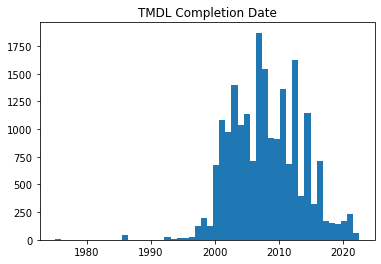

In [79]:
plt.title('TMDL Completion Date')
plt.hist(all_actions.drop_duplicates(subset='actionIdentifier')['completionDate'], bins=50);

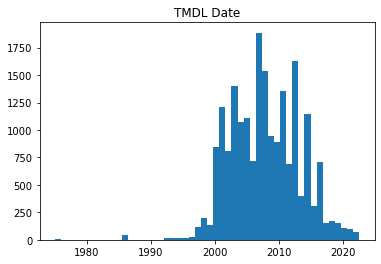

In [80]:
plt.title('TMDL Date')
plt.hist(all_actions.drop_duplicates(subset='actionIdentifier')['TMDLDate'], bins=50);

### Which pollutants most often lead to TMDLs?

In [83]:
all_actions.drop_duplicates(subset=['actionIdentifier', 'pollutantName'])['pollutantName'].value_counts(normalize=True).iloc[0:10]

FECAL COLIFORM                  0.155362
IRON                            0.102766
ESCHERICHIA COLI (E. COLI)      0.070738
PHOSPHORUS, TOTAL               0.059801
SEDIMENT                        0.040726
PH                              0.037441
ALUMINUM                        0.036657
NITROGEN, TOTAL                 0.030498
TOTAL SUSPENDED SOLIDS (TSS)    0.027586
MANGANESE                       0.027474
Name: pollutantName, dtype: float64

### Which combinations of state x pollutant are most frequent across all TMDLS?

In [86]:
pd.DataFrame(all_actions.drop_duplicates(subset=['actionIdentifier', 'pollutantName'])[['pollutantName', 'state_code']].value_counts(normalize=True).iloc[0:10])

0
pollutantName              state_code          
IRON                       WV          0.085558
FECAL COLIFORM             WV          0.050021
ALUMINUM                   WV          0.022061
PH                         WV          0.019411
ESCHERICHIA COLI (E. COLI) VA          0.017545
FECAL COLIFORM             VA          0.015902
                           KS          0.015454
MANGANESE                  WV          0.015118
DISSOLVED OXYGEN           KS          0.009705
SEDIMENT                   MT          0.009482

### For how many TMDL actions do we have one or more NPDES permit ID matches?

In [98]:
all_actions_permit_data.dropna().drop_duplicates('actionIdentifier').shape[0]

4069

# TODO: Assessments & TMDLs

In [22]:
# Need to merge on pollutant/parameter??
merged = all_actions.merge(assessments, on=['assessmentUnitIdentifier', 'organizationIdentifier', 'organizationTypeText', 'state_code'], how='right')

In [23]:
merged.head()

,organizationIdentifier,organizationTypeText,state_code,actionIdentifier,actionTypeCode,actionStatusCode,completionDate,assessmentUnitIdentifier,pollutantName,pollutantSourceTypeCode,explicitMarginofSafetyText,implicitMarginofSafetyText,TMDLEndPointText,TMDLDate,Unnamed: 0.1,Unnamed: 0,reportingCycleText,reportStatusCode,trophicStatusCode,useName,useAttainmentCode,threatenedIndicator,parameterStatusName,parameterName,cycle_first_listed,cycleLastAssessedText,cycle_scheduled_for_TMDL,assessment_date
0,21AWIC,State,AL,NaN,NaN,NaN,NaT,AL-Gulf-of-Mexico,NaN,NaN,NaN,NaN,NaN,NaT,0,1,2008-04-01,Historical,NaN,Contact Recreation,F,N,Cause,MERCURY,2006.0,1998,2013-04-01,1998-04-01
1,21AWIC,State,AL,NaN,NaN,NaN,NaT,AL-Gulf-of-Mexico,NaN,NaN,NaN,NaN,NaN,NaT,1,2,2008-04-01,Historical,NaN,Fishing,N,N,Cause,MERCURY,2006.0,1998,2013-04-01,1998-04-01
2,21AWIC,State,AL,NaN,NaN,NaN,NaT,AL-Gulf-of-Mexico,NaN,NaN,NaN,NaN,NaN,NaT,2,3,2008-04-01,Historical,NaN,Propagation of Fish and Wildlife,F,N,Cause,MERCURY,2006.0,1998,2013-04-01,1998-04-01
3,21AWIC,State,AL,NaN,NaN,NaN,NaT,AL-Gulf-of-Mexico,NaN,NaN,NaN,NaN,NaN,NaT,3,4,2008-04-01,Historical,NaN,Shellfishing,N,N,Cause,MERCURY,2006.0,1998,2013-04-01,1998-04-01
4,21AWIC,State,AL,NaN,NaN,NaN,NaT,AL-Gulf-of-Mexico,NaN,NaN,NaN,NaN,NaN,NaT,4,5,2008-04-01,Historical,NaN,Industrial and Agriculture Uses,F,N,Cause,MERCURY,2006.0,1998,2013-04-01,1998-04-01


### How many AUs scheduled to receive a TMDL never received one?
Below, 'True' indicates that an AU never received a TMDL

In [ ]:
merged.drop_duplicates(subset='assessmentUnitIdentifier')[['TMDLDate']].isna().value_counts(normalize=True)

### For those that did eventually receive a TMDL, what is the distribution of years between when the TMDL was scheduled, and when the TMDL was received?

In [44]:
delays = (merged.drop_duplicates(subset='assessmentUnitIdentifier')['TMDLDate']-merged.drop_duplicates(subset='assessmentUnitIdentifier')['cycle_scheduled_for_TMDL']) / dt.timedelta(days=365)

In [ ]:
plt.hist(delays, bins=50)
plt.title('Years between TMDL schedule date and TMDL Date')